## Here we visualize bivariate Gaussian distribution

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### Multivariate Gaussian

In [2]:
def multivariate_gaussian(x, mu, Sigma):
    """Multivariate Gaussian distribution on array x.

    x is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', x-mu, Sigma_inv, x-mu)

    return np.exp(-fac / 2) / N

### Visualization

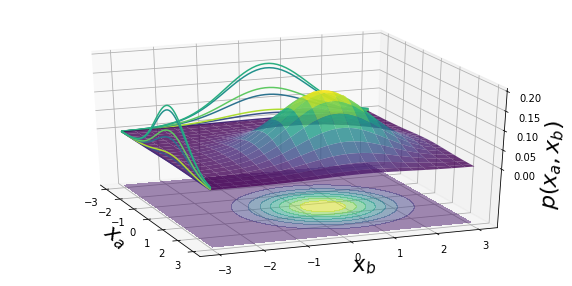

In [4]:
# Our 2-dimensional distribution will be over variables x_a and x_b
N = 60
x_a = np.linspace(-3, 3, N)
x_b = np.linspace(-3, 3, N)
x_a, x_b = np.meshgrid(x_a, x_b)

# Mean vector and covariance matrix
mu = np.array([0.5, 0.5])
Sigma = np.array([[ 1 , 0], [0,  1]])

# Pack x_a and x_b into a single 3-dimensional array
x = np.empty(x_a.shape + (2,))
x[:, :, 0] = x_a
x[:, :, 1] = x_b

Z = multivariate_gaussian(x, mu, Sigma)


fig = plt.figure(figsize=(10,5))

ax = fig.gca(projection='3d')
# Surface plot
ax.plot_surface(x_a, x_b, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha=0.8)

# Projected filled contour plot below
cset = ax.contourf(x_a, x_b, Z, zdir='z', offset=-0.15, cmap=cm.viridis, alpha=0.5)
# Projections on x_a and x_b
cset = ax.contour(x_a, x_b, Z, zdir='x', offset=-3, cmap=cm.viridis)
cset = ax.contour(x_a, x_b, Z, zdir='y', offset=-3, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zlabel('$p(x_a,x_b)$', fontsize=22)
ax.set_xlabel('$x_a$', fontsize=22)
ax.set_ylabel('$x_b$', fontsize=22)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)


plt.show()

### Extra HW: 

Using the derivations for marginal and conditional distributions, you can visualise them on the plot. 

The function you may need:

In [5]:
def univariate_normal(x, mu, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mu)**2 / (2 * variance)))

In [ ]:
N = 60
x_a = np.linspace(-3, 3, N)
x_b = np.linspace(-3, 3, N)
x_a, x_b = np.meshgrid(x_a, x_b)

# Mean vector and covariance matrix
mu = np.array([0.5, 0.5])
Sigma = np.array([[ 1 , 0], [0,  1]])

# Pack x_a and x_b into a single 3-dimensional array
x = np.empty(x_a.shape + (2,))
x[:, :, 0] = x_a
x[:, :, 1] = x_b

# marginal
mu_xa = mu[0,0]
mu_xb = mu[1,0]

A = sigma[0,0]
B = sigma[1,1]
C = sigma[0,1]

Z = multivariate_gaussian(x, mu, Sigma)


fig = plt.figure(figsize=(10,5))

ax = fig.gca(projection='3d')
# Surface plot
ax.plot_surface(x_a, x_b, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha=0.8)

# Projected filled contour plot below
cset = ax.contourf(x_a, x_b, Z, zdir='z', offset=-0.15, cmap=cm.viridis, alpha=0.5)
# Projections on x_a and x_b
cset = ax.contour(x_a, x_b, Z, zdir='x', offset=-3, cmap=cm.viridis)
cset = ax.contour(x_a, x_b, Z, zdir='y', offset=-3, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zlabel('$p(x_a,x_b)$', fontsize=22)
ax.set_xlabel('$x_a$', fontsize=22)
ax.set_ylabel('$x_b$', fontsize=22)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)


plt.show()

References: 

1. Nice visualization https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
    
